# Evaluation of RAG vs Baseline
This notebook evaluates the question answering results stored in `results_baseline.csv` and `results_rag.csv`.
It visualises different metrics to compare the baseline system with the RAG implementation.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style='whitegrid')
palette = {'Baseline': 'tab:blue', 'RAG': 'tab:orange'}
heatmap_cmap = "Oranges"

baseline = pd.read_csv(Path('results_baseline.csv'))
rag = pd.read_csv(Path('results_rag.csv'))

ngram_metrics = ['precision-1','recall-1','ROUGE-1','precision-2','recall-2','ROUGE-2']
judge_metrics = ['factual_correctness','completeness','relevance','justification','depth']
metrics = ngram_metrics + judge_metrics

for df in (baseline, rag):
    for col in metrics + ['overall_score']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df['paper'] = df['question_id'].str.extract(r'^(..)_')
    df['n_score'] = df[ngram_metrics].mean(axis=1)
    df['judge_score'] = df[judge_metrics].mean(axis=1)

# Font size variables
title_fontsize = 18
label_fontsize = 15
tick_fontsize = 13
annot_fontsize = 14
legend_fontsize = 14


## Average metrics across all questions

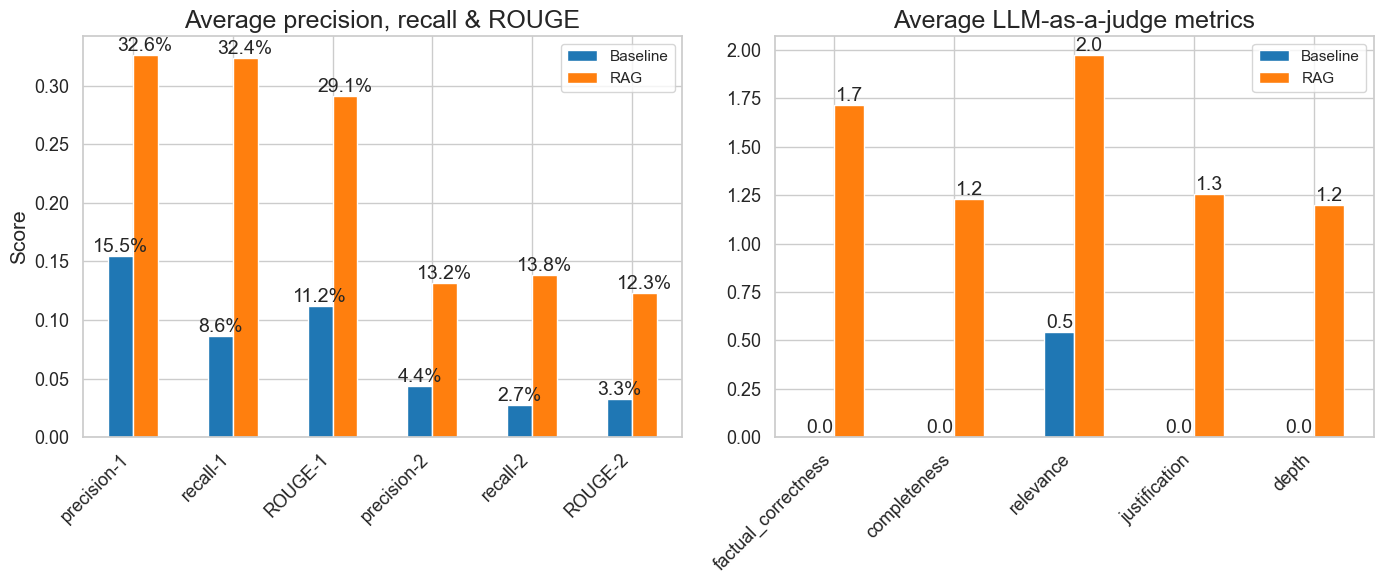

In [ ]:
avg_base_n = baseline[ngram_metrics].mean()
avg_rag_n = rag[ngram_metrics].mean()
avg_base_j = baseline[judge_metrics].mean()
avg_rag_j = rag[judge_metrics].mean()
fig, axes = plt.subplots(1,2, figsize=(14,6))
pd.DataFrame({'Baseline': avg_base_n, 'RAG': avg_rag_n}).plot(
    kind='bar', ax=axes[0], color=[palette['Baseline'], palette['RAG']])
axes[0].set_ylabel('Score', fontsize=label_fontsize)
axes[0].set_title('Average precision, recall & ROUGE', fontsize=title_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
for p in axes[0].patches:
    height = p.get_height()
    label = f'{height:.1%}' if height <= 1 else f'{height:.1f}'
    axes[0].annotate(label, (p.get_x()+p.get_width()/2., height), 
                     ha='center', va='bottom', fontsize=annot_fontsize)
pd.DataFrame({'Baseline': avg_base_j, 'RAG': avg_rag_j}).plot(
    kind='bar', ax=axes[1], color=[palette['Baseline'], palette['RAG']])
axes[1].set_title('Average LLM-as-a-judge metrics', fontsize=title_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
for p in axes[1].patches:
    height = p.get_height()
    label = f'{height:.1f}' if height <= 1 else f'{height:.1f}'
    axes[1].annotate(label, (p.get_x()+p.get_width()/2., height), 
                     ha='center', va='bottom', fontsize=annot_fontsize)
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_fontsize)
plt.tight_layout()
plt.show()

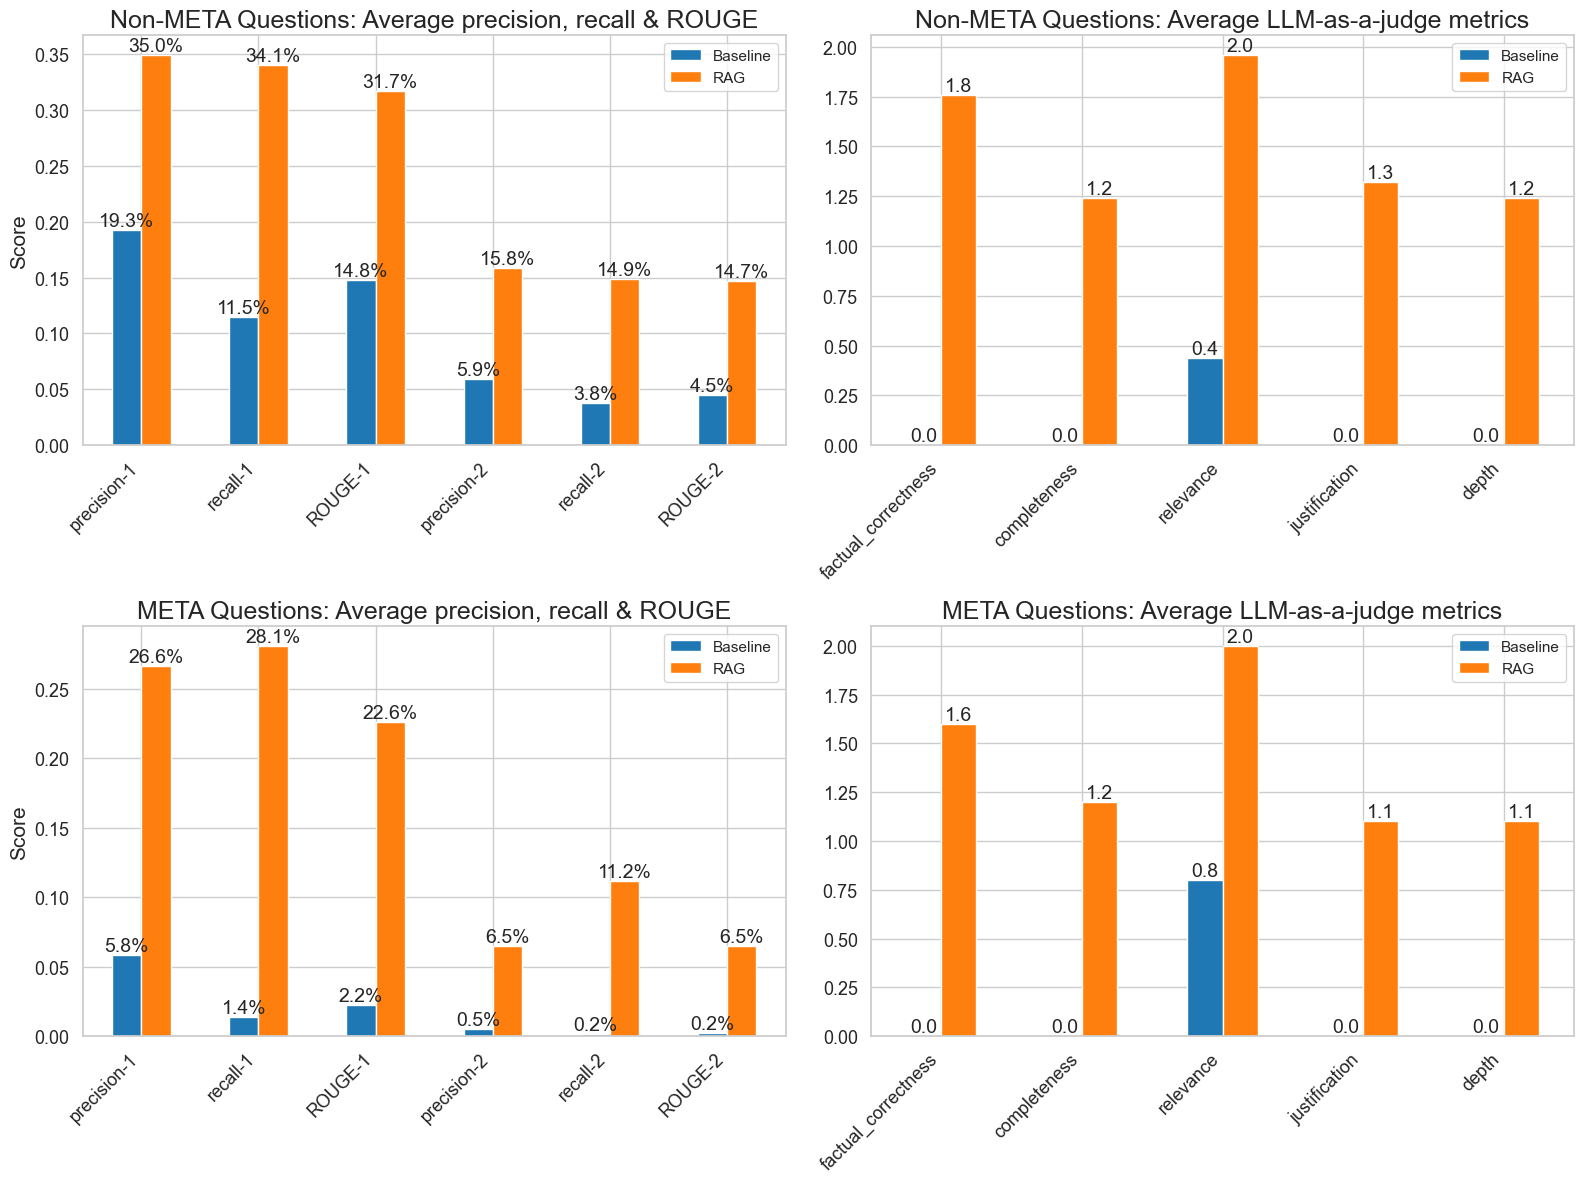

In [3]:
# Split data into META and non-META questions
baseline_non_meta = baseline[~baseline['question_id'].str.contains('META')]
baseline_meta = baseline[baseline['question_id'].str.contains('META')]
rag_non_meta = rag[~rag['question_id'].str.contains('META')]
rag_meta = rag[rag['question_id'].str.contains('META')]

# Calculate averages for each subset
avg_base_n_non_meta = baseline_non_meta[ngram_metrics].mean()
avg_rag_n_non_meta = rag_non_meta[ngram_metrics].mean()
avg_base_j_non_meta = baseline_non_meta[judge_metrics].mean()
avg_rag_j_non_meta = rag_non_meta[judge_metrics].mean()

avg_base_n_meta = baseline_meta[ngram_metrics].mean()
avg_rag_n_meta = rag_meta[ngram_metrics].mean()
avg_base_j_meta = baseline_meta[judge_metrics].mean()
avg_rag_j_meta = rag_meta[judge_metrics].mean()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top row: Non-META questions
# Top left: N-gram metrics for non-META
pd.DataFrame({'Baseline': avg_base_n_non_meta, 'RAG': avg_rag_n_non_meta}).plot(
    kind='bar', ax=axes[0, 0], color=[palette['Baseline'], palette['RAG']])
axes[0, 0].set_ylabel('Score', fontsize=label_fontsize)
axes[0, 0].set_title('Non-META Questions: Average precision, recall & ROUGE', fontsize=title_fontsize)
axes[0, 0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0, 0].tick_params(axis='y', labelsize=tick_fontsize)
for p in axes[0, 0].patches:
    height = p.get_height()
    label = f'{height:.1%}' if height <= 1 else f'{height:.1f}'
    axes[0, 0].annotate(label, (p.get_x()+p.get_width()/2., height), 
                     ha='center', va='bottom', fontsize=annot_fontsize)

# Top right: Judge metrics for non-META
pd.DataFrame({'Baseline': avg_base_j_non_meta, 'RAG': avg_rag_j_non_meta}).plot(
    kind='bar', ax=axes[0, 1], color=[palette['Baseline'], palette['RAG']])
axes[0, 1].set_title('Non-META Questions: Average LLM-as-a-judge metrics', fontsize=title_fontsize)
axes[0, 1].tick_params(axis='x', labelsize=tick_fontsize)
axes[0, 1].tick_params(axis='y', labelsize=tick_fontsize)
for p in axes[0, 1].patches:
    height = p.get_height()
    label = f'{height:.1f}' if height <= 1 else f'{height:.1f}'
    axes[0, 1].annotate(label, (p.get_x()+p.get_width()/2., height), 
                     ha='center', va='bottom', fontsize=annot_fontsize)

# Bottom row: META questions
# Bottom left: N-gram metrics for META
pd.DataFrame({'Baseline': avg_base_n_meta, 'RAG': avg_rag_n_meta}).plot(
    kind='bar', ax=axes[1, 0], color=[palette['Baseline'], palette['RAG']])
axes[1, 0].set_ylabel('Score', fontsize=label_fontsize)
axes[1, 0].set_title('META Questions: Average precision, recall & ROUGE', fontsize=title_fontsize)
axes[1, 0].tick_params(axis='x', labelsize=tick_fontsize)
axes[1, 0].tick_params(axis='y', labelsize=tick_fontsize)
for p in axes[1, 0].patches:
    height = p.get_height()
    label = f'{height:.1%}' if height <= 1 else f'{height:.1f}'
    axes[1, 0].annotate(label, (p.get_x()+p.get_width()/2., height), 
                     ha='center', va='bottom', fontsize=annot_fontsize)

# Bottom right: Judge metrics for META
pd.DataFrame({'Baseline': avg_base_j_meta, 'RAG': avg_rag_j_meta}).plot(
    kind='bar', ax=axes[1, 1], color=[palette['Baseline'], palette['RAG']])
axes[1, 1].set_title('META Questions: Average LLM-as-a-judge metrics', fontsize=title_fontsize)
axes[1, 1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1, 1].tick_params(axis='y', labelsize=tick_fontsize)
for p in axes[1, 1].patches:
    height = p.get_height()
    label = f'{height:.1f}' if height <= 1 else f'{height:.1f}'
    axes[1, 1].annotate(label, (p.get_x()+p.get_width()/2., height), 
                     ha='center', va='bottom', fontsize=annot_fontsize)

# Fix x-tick labels rotation for all subplots
for row in axes:
    for ax in row:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_fontsize)

plt.tight_layout()
plt.show()

## Pass/fail counts

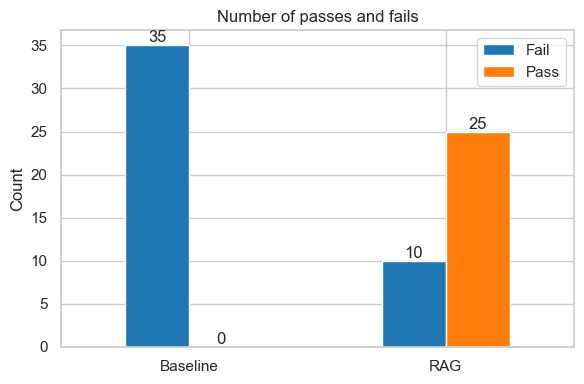

In [4]:
pass_base = baseline['pass'].astype(bool).value_counts()
pass_rag = rag['pass'].astype(bool).value_counts()
count_df = pd.DataFrame({'Baseline': pass_base, 'RAG': pass_rag}).fillna(0).T
count_df.columns = ['Fail','Pass']
ax = count_df.plot(kind='bar', stacked=False, figsize=(6,4), color=[palette['Baseline'], palette['RAG']])
ax.set_ylabel('Count')
ax.set_title('Number of passes and fails')
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Heatmaps of precision/recall/ROUGE per question

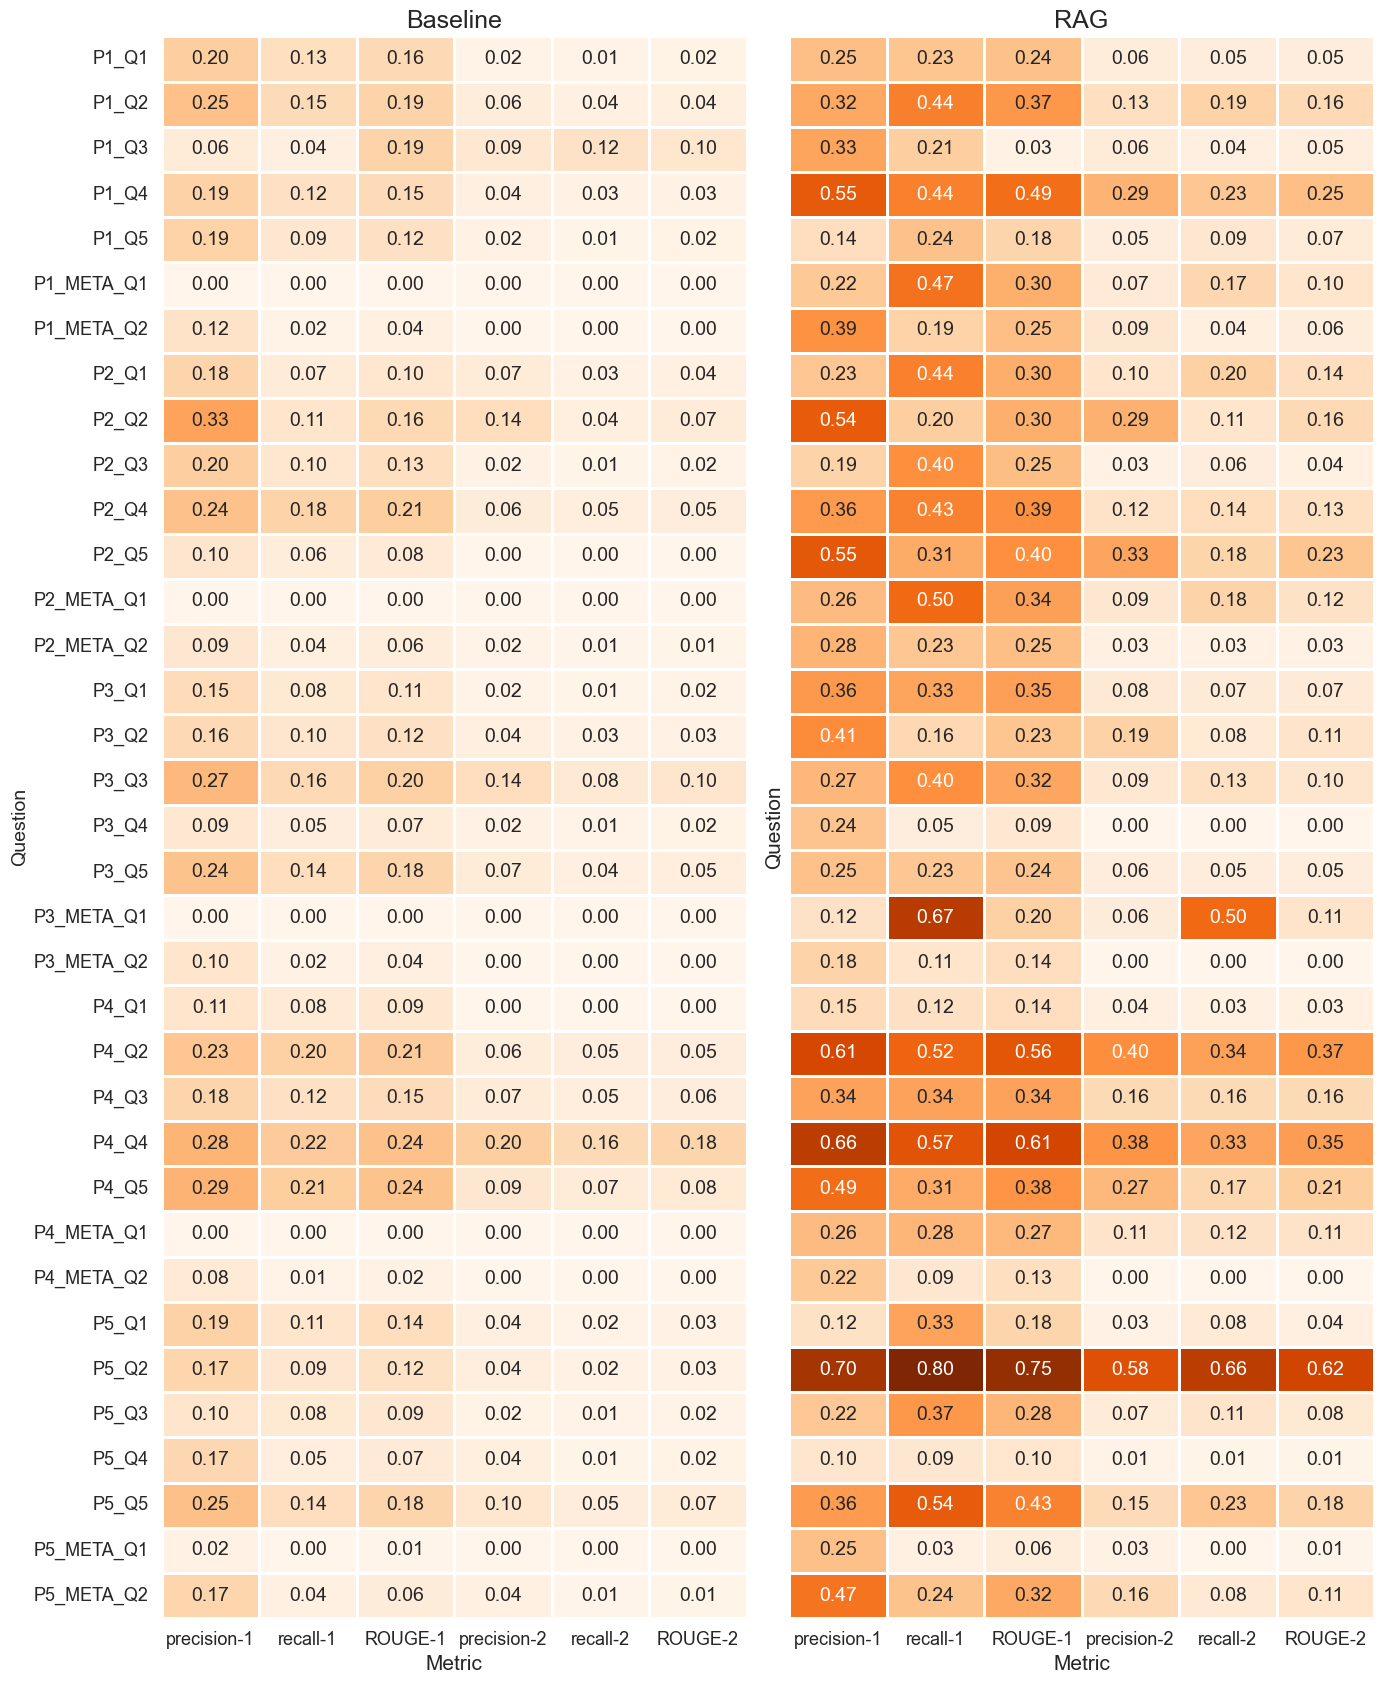

In [5]:
fig, axes = plt.subplots(
    1, 2, 
    figsize=(14, 17),  # increase height
    sharey=True, 
    gridspec_kw={'height_ratios': [1]}
)
vmin = min(baseline[ngram_metrics].min().min(), rag[ngram_metrics].min().min())
vmax = max(baseline[ngram_metrics].max().max(), rag[ngram_metrics].max().max())

sns.heatmap(
    baseline[ngram_metrics],
    ax=axes[0],
    vmin=vmin, vmax=vmax,
    cmap=heatmap_cmap,
    annot=True,
    fmt='.2f',
    annot_kws={'fontsize': annot_fontsize},
    linewidths=2,
    cbar=False
)
axes[0].set_title('Baseline', fontsize=title_fontsize)
axes[0].set_xlabel('Metric', fontsize=label_fontsize)
axes[0].set_ylabel('Question', fontsize=legend_fontsize)
axes[0].set_yticklabels(baseline['question_id'], rotation=0, fontsize=tick_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

sns.heatmap(
    rag[ngram_metrics],
    ax=axes[1],
    vmin=vmin, vmax=vmax,
    cmap=heatmap_cmap,
    annot=True,
    fmt='.2f',
    annot_kws={'fontsize': annot_fontsize},
    linewidths=2,
    cbar=False
)
axes[1].set_title('RAG', fontsize=title_fontsize)
axes[1].set_xlabel('Metric', fontsize=label_fontsize)
axes[1].set_ylabel('Question', fontsize=label_fontsize)
axes[1].set_yticklabels(rag['question_id'], rotation=0, fontsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

plt.tight_layout()
plt.show()


## Heatmaps of LLM-as-a-Judge Metrics per question

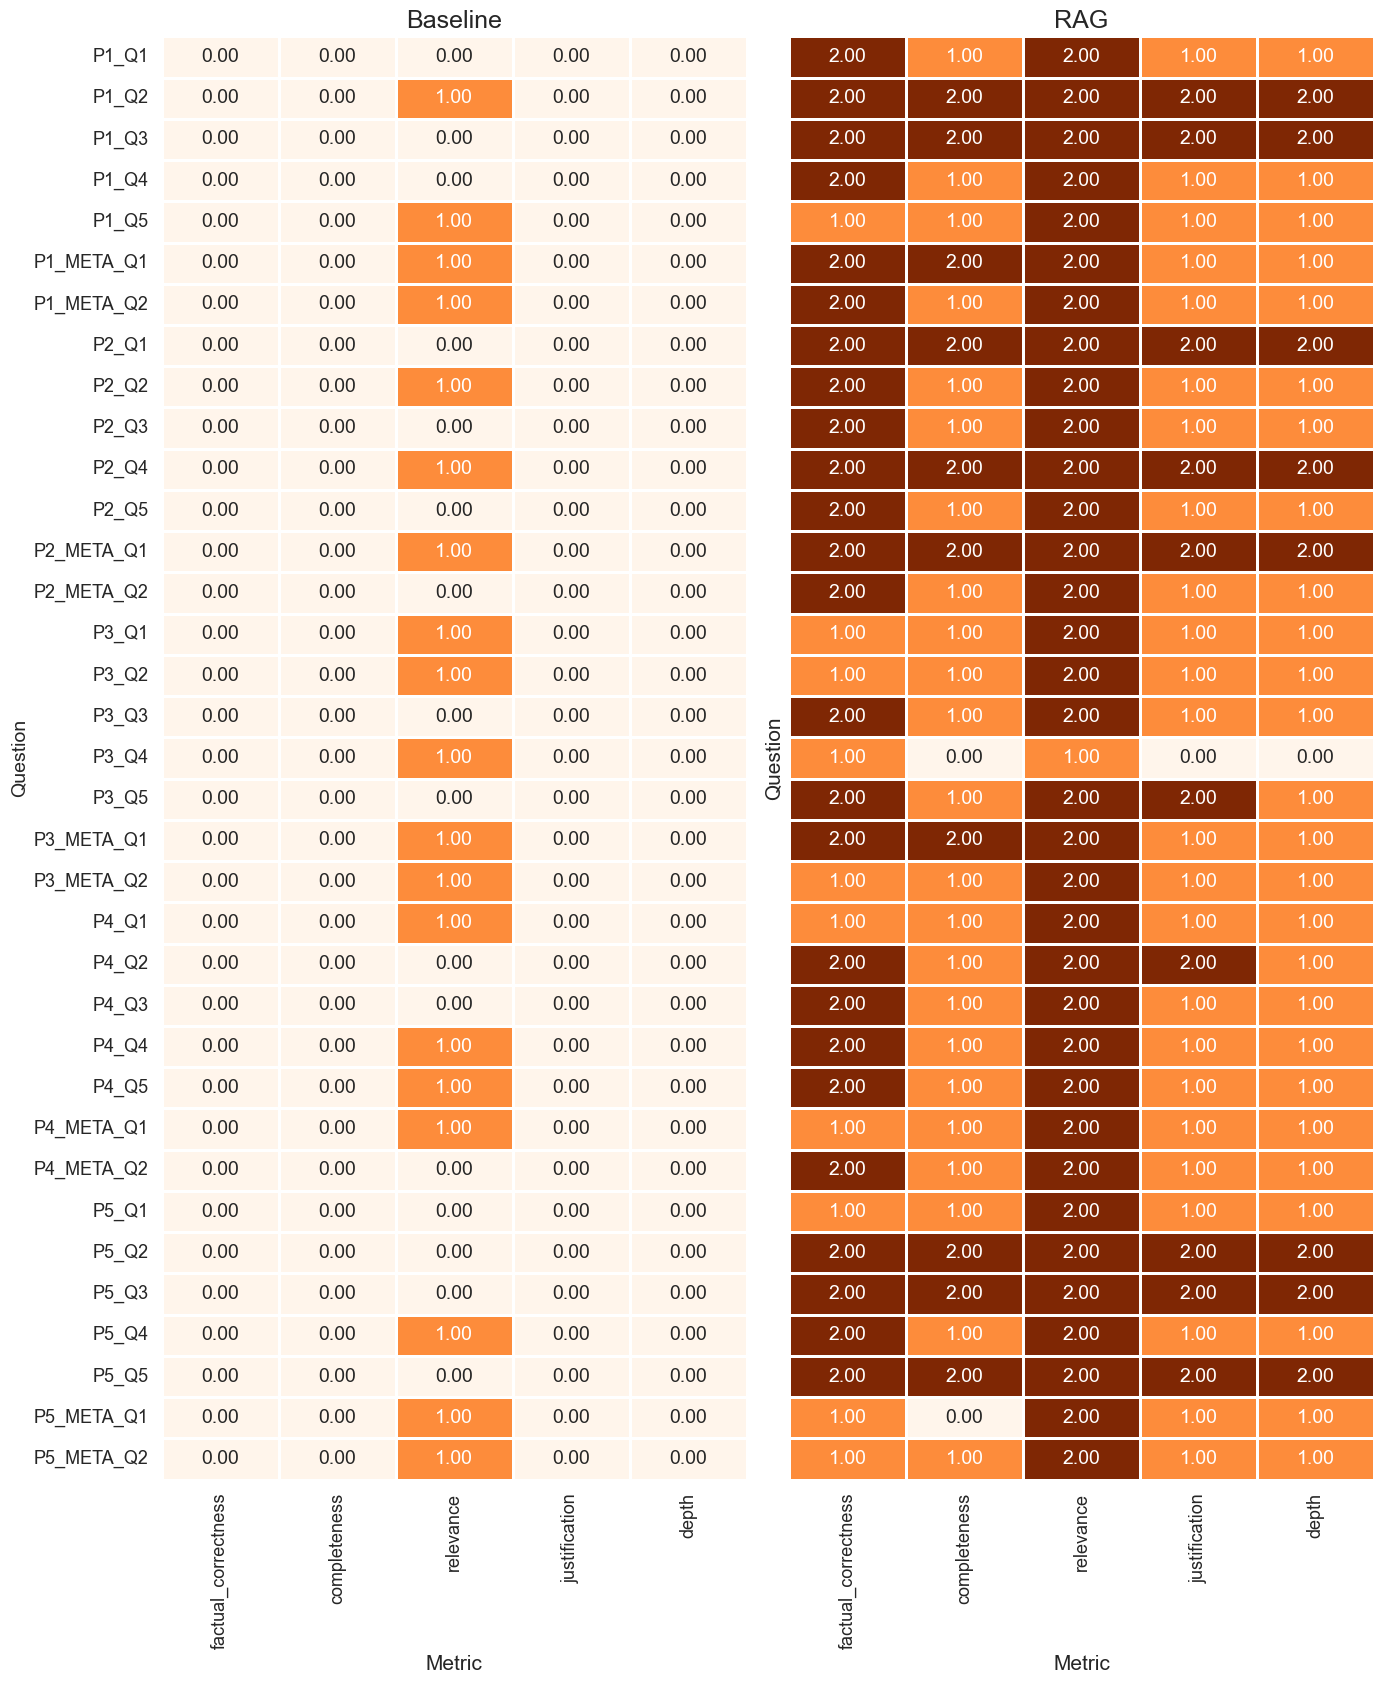

In [6]:
fig, axes = plt.subplots(
    1, 2, 
    figsize=(14, 17),  # increase height
    sharey=True, 
    gridspec_kw={'height_ratios': [1]}
)
vmin = min(baseline[judge_metrics].min().min(), rag[judge_metrics].min().min())
vmax = max(baseline[judge_metrics].max().max(), rag[judge_metrics].max().max())

sns.heatmap(
    baseline[judge_metrics],
    ax=axes[0],
    vmin=vmin, vmax=vmax,
    cmap=heatmap_cmap,
    annot=True,
    fmt='.2f',
    annot_kws={'fontsize': annot_fontsize},
    linewidths=2,
    cbar=False
)
axes[0].set_title('Baseline', fontsize=title_fontsize)
axes[0].set_xlabel('Metric', fontsize=label_fontsize)
axes[0].set_ylabel('Question', fontsize=legend_fontsize)
axes[0].set_yticklabels(baseline['question_id'], rotation=0, fontsize=tick_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

sns.heatmap(
    rag[judge_metrics],
    ax=axes[1],
    vmin=vmin, vmax=vmax,
    cmap=heatmap_cmap,
    annot=True,
    fmt='.2f',
    annot_kws={'fontsize': annot_fontsize},
    linewidths=2,
    cbar=False
)
axes[1].set_title('RAG', fontsize=title_fontsize)
axes[1].set_xlabel('Metric', fontsize=label_fontsize)
axes[1].set_ylabel('Question', fontsize=label_fontsize)
axes[1].set_yticklabels(rag['question_id'], rotation=0, fontsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

plt.tight_layout()
plt.show()


## Metrics per paper

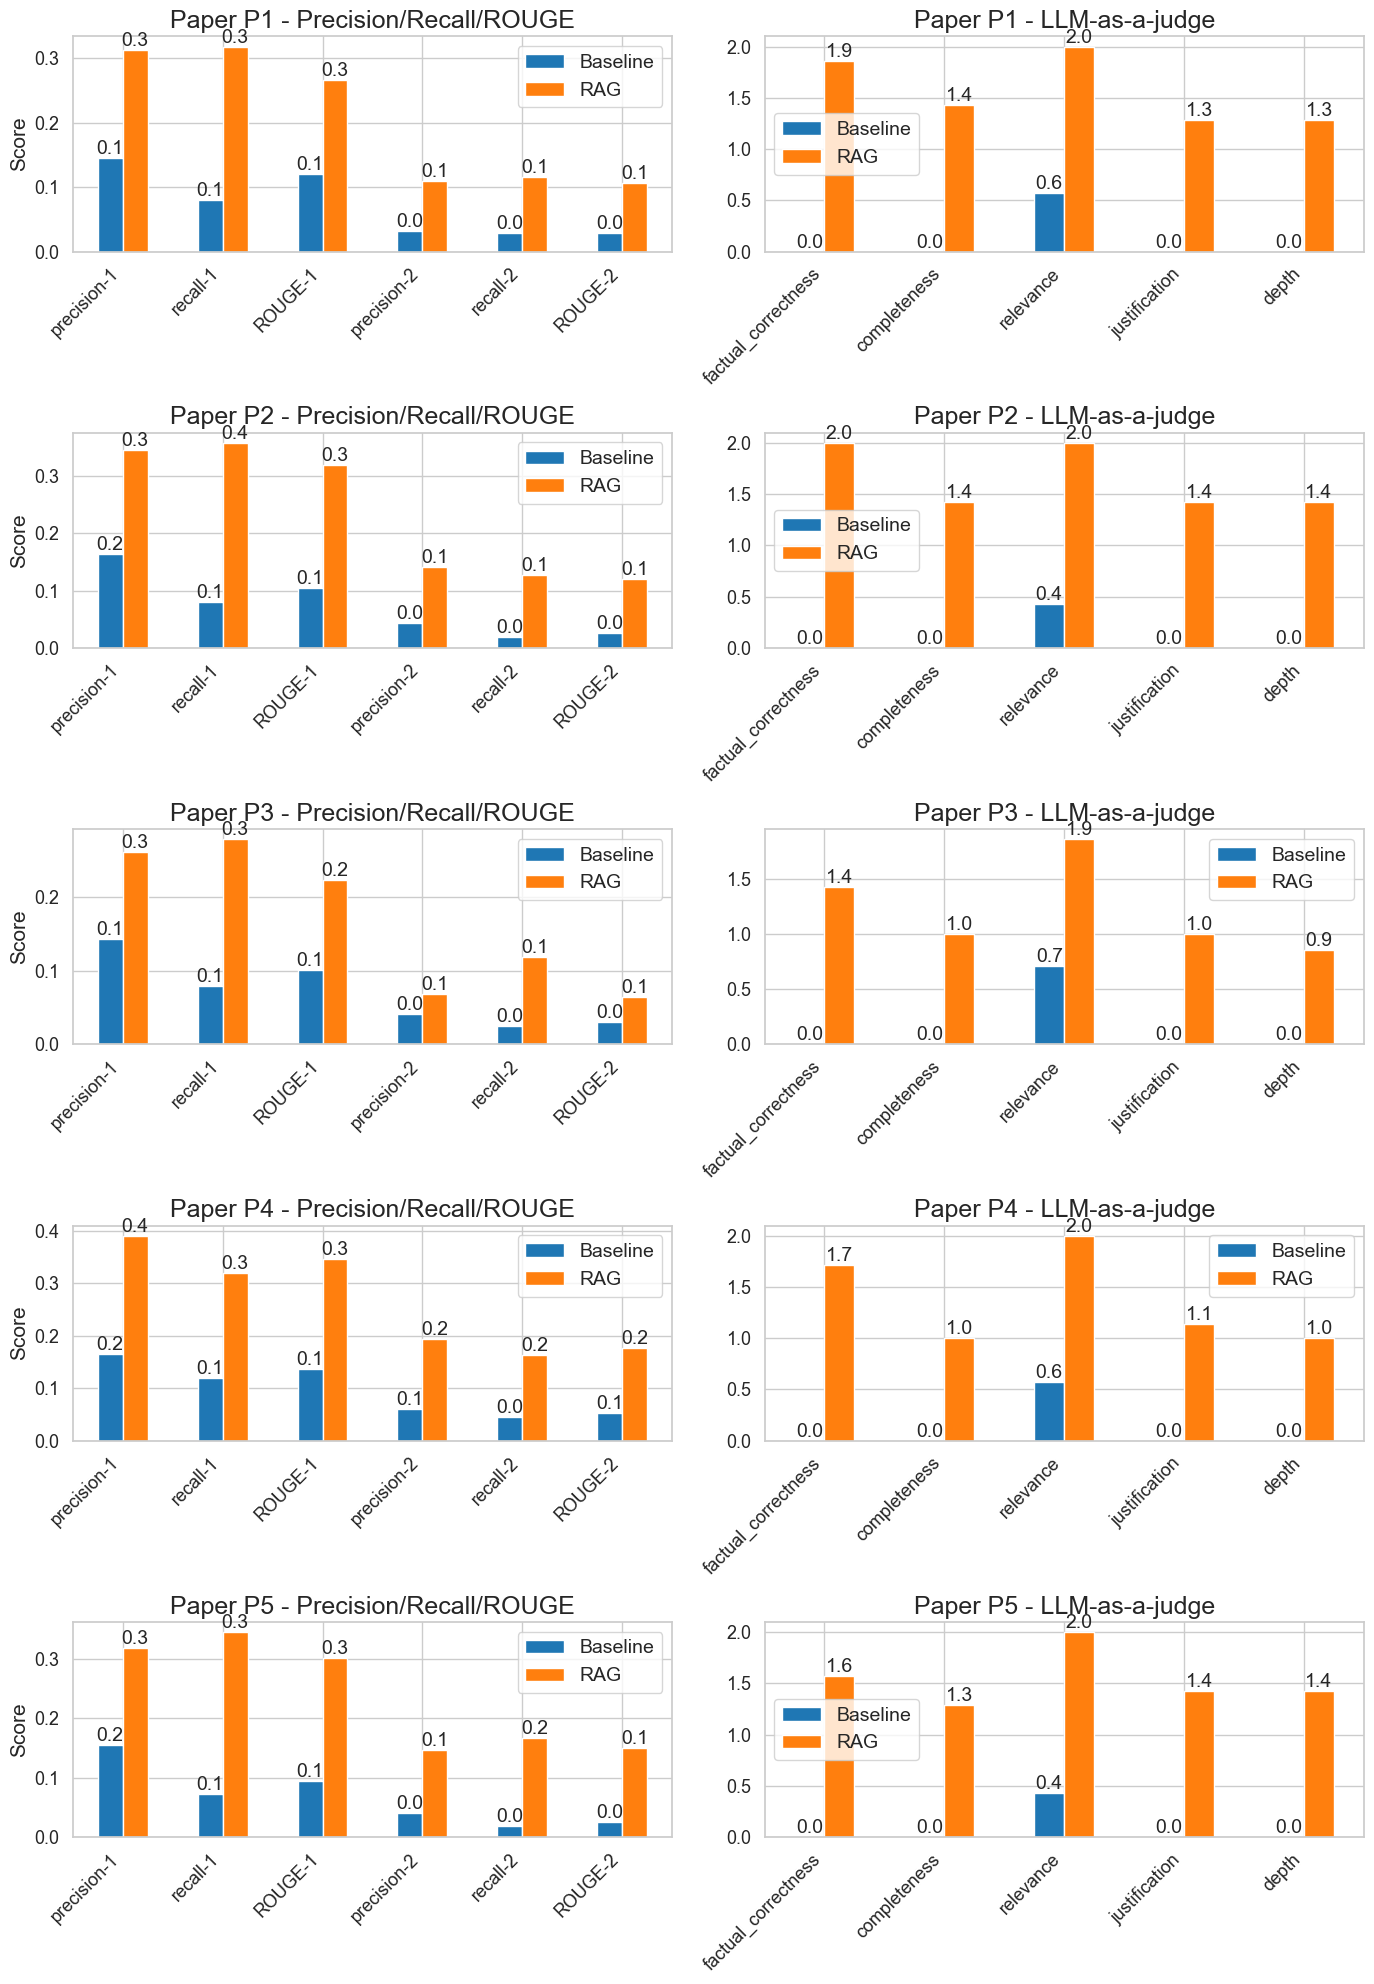

In [7]:
papers = sorted(baseline['paper'].unique())
fig, axes = plt.subplots(len(papers), 2, figsize=(14, 4*len(papers)))
for idx, paper in enumerate(papers):
    b_group = baseline[baseline['paper']==paper]
    r_group = rag[rag['paper']==paper]
    avg_b_n = b_group[ngram_metrics].mean()
    avg_r_n = r_group[ngram_metrics].mean()
    avg_b_j = b_group[judge_metrics].mean()
    avg_r_j = r_group[judge_metrics].mean()
    pd.DataFrame({'Baseline': avg_b_n, 'RAG': avg_r_n}).plot(
        kind='bar', ax=axes[idx,0], color=[palette['Baseline'], palette['RAG']])
    axes[idx,0].set_ylabel('Score', fontsize=label_fontsize)
    axes[idx,0].set_title(f'Paper {paper} - Precision/Recall/ROUGE', fontsize=title_fontsize)
    axes[idx,0].tick_params(axis='x', labelsize=tick_fontsize)
    axes[idx,0].tick_params(axis='y', labelsize=tick_fontsize)
    pd.DataFrame({'Baseline': avg_b_j, 'RAG': avg_r_j}).plot(
        kind='bar', ax=axes[idx,1], color=[palette['Baseline'], palette['RAG']])
    axes[idx,1].set_title(f'Paper {paper} - LLM-as-a-judge', fontsize=title_fontsize)
    axes[idx,1].tick_params(axis='x', labelsize=tick_fontsize)
    axes[idx,1].tick_params(axis='y', labelsize=tick_fontsize)
    for ax in axes[idx]:
        for p in ax.patches:
            height = p.get_height()
            label = f'{height:.1f}' if height <= 1 else f'{height:.1f}'
            ax.annotate(label, (p.get_x()+p.get_width()/2., height), 
                        ha='center', va='bottom', fontsize=annot_fontsize)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_fontsize)
    axes[idx,0].legend(fontsize=legend_fontsize)
    axes[idx,1].legend(fontsize=legend_fontsize)
plt.tight_layout()
plt.show()


## Correlation between LLM-as-judge metrics and n-gram metrics

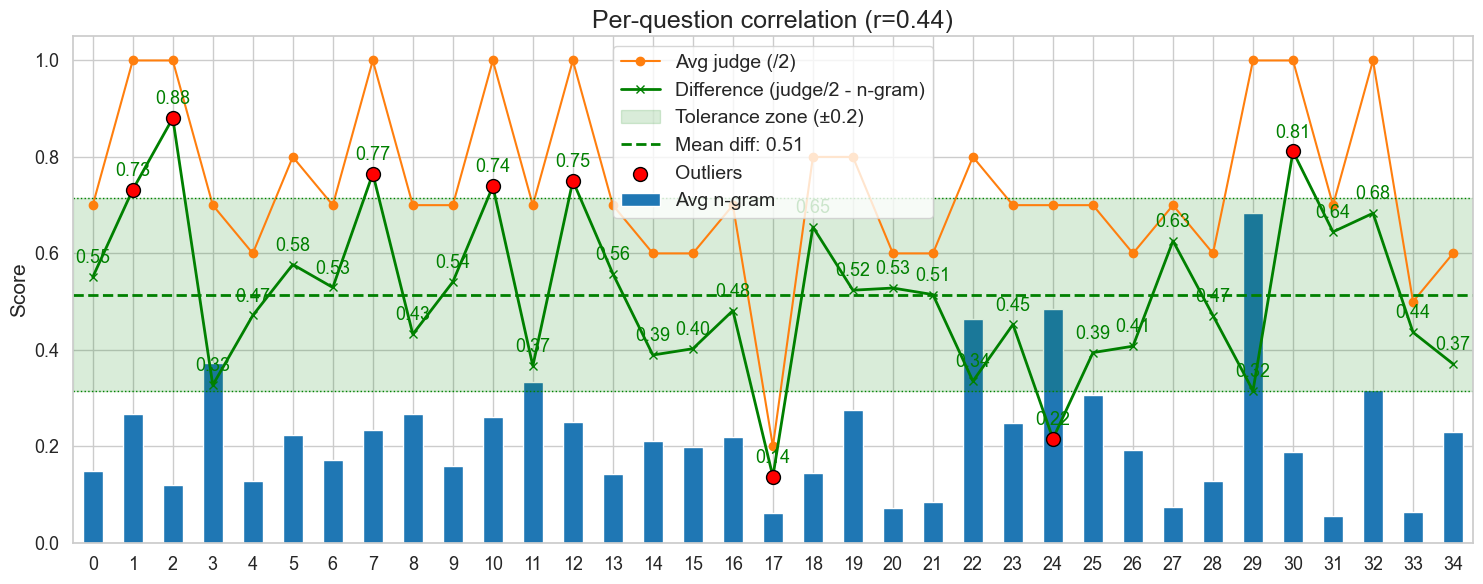

In [41]:
corr_val = rag['n_score'].corr(rag['judge_score'] / 2)
fig, ax = plt.subplots(figsize=(15,6))

bars = rag['n_score'].plot(kind='bar', ax=ax, color=palette['Baseline'], label='Avg n-gram')
line = (rag['judge_score'] / 2).plot(kind='line', ax=ax, color=palette['RAG'], marker='o', label='Avg judge (/2)')

diff = (rag['judge_score'] / 2) - rag['n_score']
ax.plot(rag.index, diff, color='green', marker='x', linestyle='-', linewidth=2, label='Difference (judge/2 - n-gram)')

mean_diff = diff.mean()
tol = 0.2

# Highlight tolerance zone
ax.axhspan(mean_diff - tol, mean_diff + tol, color='green', alpha=0.15, label='Tolerance zone (±0.2)')

ax.axhline(mean_diff, color='green', linestyle='--', linewidth=2, label=f'Mean diff: {mean_diff:.2f}')
ax.axhline(mean_diff + tol, color='green', linestyle=':', linewidth=1)
ax.axhline(mean_diff - tol, color='green', linestyle=':', linewidth=1)

outliers = rag.index[(diff > mean_diff + tol) | (diff < mean_diff - tol)]
ax.scatter(outliers, diff[outliers], color='red', s=100, edgecolor='black', zorder=5, label='Outliers')

# Annotate avg n-gram values just above the bars
for i, val in enumerate(rag['n_score']):
    ax.annotate(f"{diff[i]:.2f}", (i, diff[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=tick_fontsize, color='green')

ax.set_ylabel('Score', fontsize=label_fontsize)
ax.set_title(f'Per-question correlation (r={corr_val:.2f})', fontsize=title_fontsize)
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)

plt.tight_layout()
plt.show()


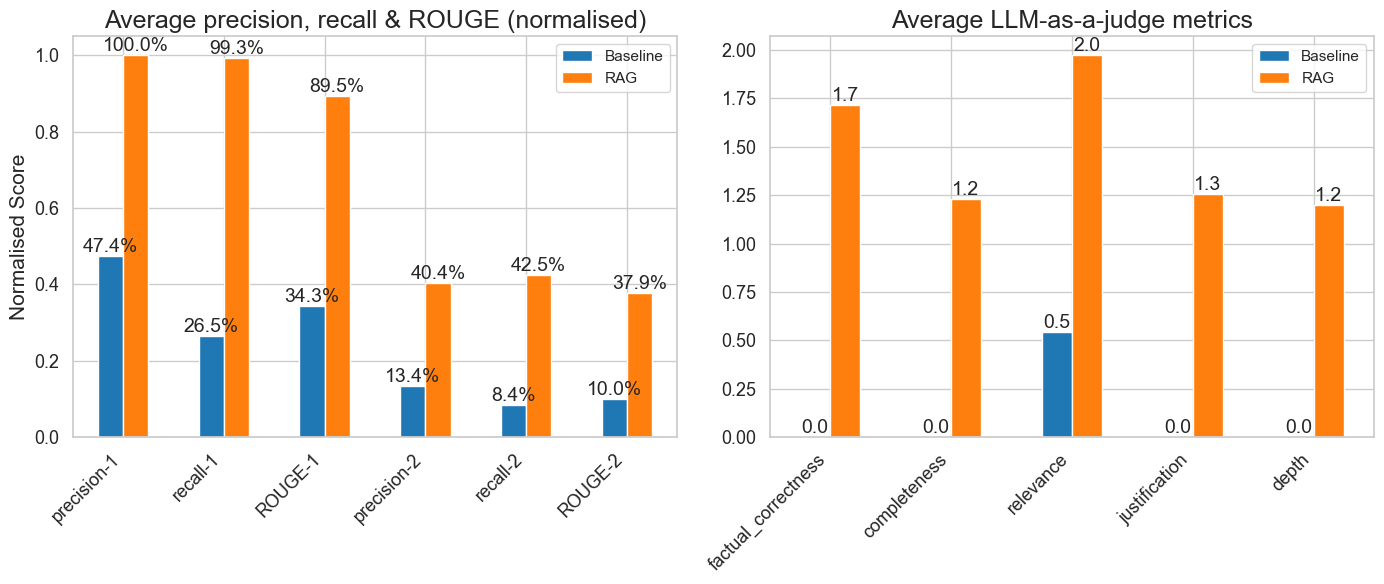

In [48]:
# Find the highest average n-gram score across both baseline and rag
max_avg_ngram = max(
    baseline[ngram_metrics].mean().max(),
    rag[ngram_metrics].mean().max()
)

# Normalise n-gram averages by the highest average n-gram score
avg_base_n_norm = avg_base_n / max_avg_ngram
avg_rag_n_norm = avg_rag_n / max_avg_ngram

fig, axes = plt.subplots(1,2, figsize=(14,6))
pd.DataFrame({'Baseline': avg_base_n_norm, 'RAG': avg_rag_n_norm}).plot(
    kind='bar', ax=axes[0], color=[palette['Baseline'], palette['RAG']])
axes[0].set_ylabel('Normalised Score', fontsize=label_fontsize)
axes[0].set_title('Average precision, recall & ROUGE (normalised)', fontsize=title_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
for p in axes[0].patches:
    height = p.get_height()
    label = f'{height:.1%}' if height <= 1 else f'{height:.1f}'
    axes[0].annotate(label, (p.get_x()+p.get_width()/2., height), 
                     ha='center', va='bottom', fontsize=annot_fontsize)
pd.DataFrame({'Baseline': avg_base_j, 'RAG': avg_rag_j}).plot(
    kind='bar', ax=axes[1], color=[palette['Baseline'], palette['RAG']])
axes[1].set_title('Average LLM-as-a-judge metrics', fontsize=title_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
for p in axes[1].patches:
    height = p.get_height()
    label = f'{height:.1f}' if height <= 1 else f'{height:.1f}'
    axes[1].annotate(label, (p.get_x()+p.get_width()/2., height), 
                     ha='center', va='bottom', fontsize=annot_fontsize)
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_fontsize)
plt.tight_layout()
plt.show()

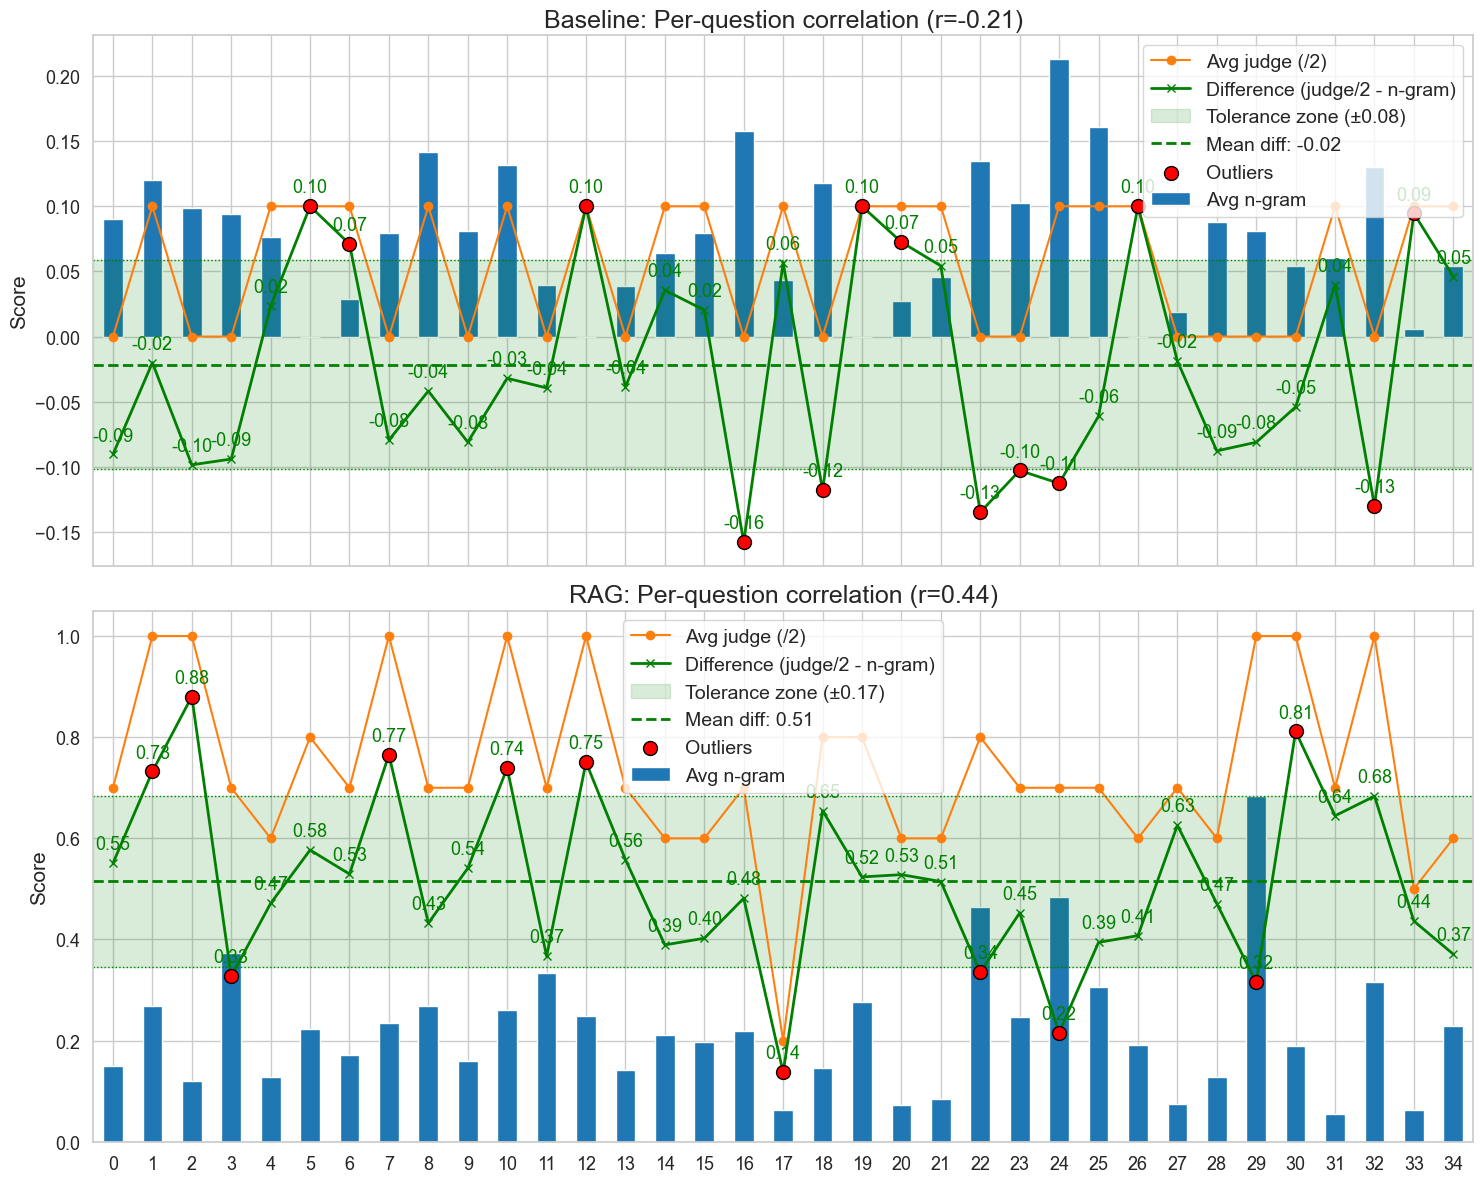

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
# Baseline plot
corr_val_base = baseline['n_score'].corr(baseline['judge_score'] / 2)
diff_base = (baseline['judge_score'] / 2) - baseline['n_score']
mean_diff_base = diff_base.mean()
std_diff_base = diff_base.std()
tol_base = std_diff_base * 1.0  # 1 standard deviation as adaptive tolerance
outliers_base = baseline.index[(diff_base > mean_diff_base + tol_base) | (diff_base < mean_diff_base - tol_base)]

baseline['n_score'].plot(kind='bar', ax=axes[0], color=palette['Baseline'], label='Avg n-gram')
(baseline['judge_score'] / 2).plot(kind='line', ax=axes[0], color=palette['RAG'], marker='o', label='Avg judge (/2)')
axes[0].plot(baseline.index, diff_base, color='green', marker='x', linestyle='-', linewidth=2, label='Difference (judge/2 - n-gram)')
axes[0].axhspan(mean_diff_base - tol_base, mean_diff_base + tol_base, color='green', alpha=0.15, label=f'Tolerance zone (±{tol_base:.2f})')
axes[0].axhline(mean_diff_base, color='green', linestyle='--', linewidth=2, label=f'Mean diff: {mean_diff_base:.2f}')
axes[0].axhline(mean_diff_base + tol_base, color='green', linestyle=':', linewidth=1)
axes[0].axhline(mean_diff_base - tol_base, color='green', linestyle=':', linewidth=1)
axes[0].scatter(outliers_base, diff_base[outliers_base], color='red', s=100, edgecolor='black', zorder=5, label='Outliers')
for i, val in enumerate(baseline['n_score']):
    axes[0].annotate(f"{diff_base.iloc[i]:.2f}", (i, diff_base.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=tick_fontsize, color='green')
axes[0].set_ylabel('Score', fontsize=label_fontsize)
axes[0].set_title(f'Baseline: Per-question correlation (r={corr_val_base:.2f})', fontsize=title_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].legend(fontsize=legend_fontsize)

# RAG plot
corr_val_rag = rag['n_score'].corr(rag['judge_score'] / 2)
diff_rag = (rag['judge_score'] / 2) - rag['n_score']
mean_diff_rag = diff_rag.mean()
std_diff_rag = diff_rag.std()
tol_rag = std_diff_rag * 1.0  # 1 standard deviation as adaptive tolerance
outliers_rag = rag.index[(diff_rag > mean_diff_rag + tol_rag) | (diff_rag < mean_diff_rag - tol_rag)]

rag['n_score'].plot(kind='bar', ax=axes[1], color=palette['Baseline'], label='Avg n-gram')
(rag['judge_score'] / 2).plot(kind='line', ax=axes[1], color=palette['RAG'], marker='o', label='Avg judge (/2)')
axes[1].plot(rag.index, diff_rag, color='green', marker='x', linestyle='-', linewidth=2, label='Difference (judge/2 - n-gram)')
axes[1].axhspan(mean_diff_rag - tol_rag, mean_diff_rag + tol_rag, color='green', alpha=0.15, label=f'Tolerance zone (±{tol_rag:.2f})')
axes[1].axhline(mean_diff_rag, color='green', linestyle='--', linewidth=2, label=f'Mean diff: {mean_diff_rag:.2f}')
axes[1].axhline(mean_diff_rag + tol_rag, color='green', linestyle=':', linewidth=1)
axes[1].axhline(mean_diff_rag - tol_rag, color='green', linestyle=':', linewidth=1)
axes[1].scatter(outliers_rag, diff_rag[outliers_rag], color='red', s=100, edgecolor='black', zorder=5, label='Outliers')
for i, val in enumerate(rag['n_score']):
    axes[1].annotate(f"{diff_rag.iloc[i]:.2f}", (i, diff_rag.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=tick_fontsize, color='green')
axes[1].set_ylabel('Score', fontsize=label_fontsize)
axes[1].set_title(f'RAG: Per-question correlation (r={corr_val_rag:.2f})', fontsize=title_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].legend(fontsize=legend_fontsize)

plt.tight_layout()
plt.show()

## Additional plots

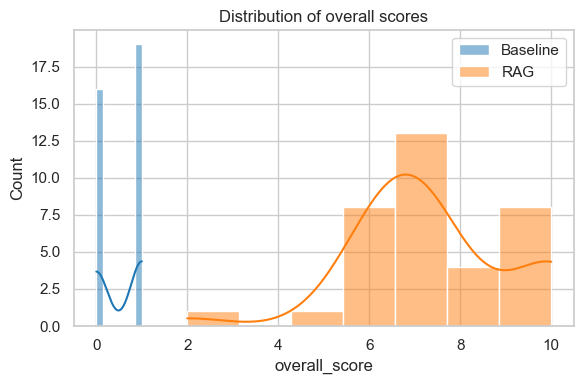

In [9]:
# Distribution of overall scores
plt.figure(figsize=(6,4))
sns.histplot(baseline['overall_score'], color=palette['Baseline'], label='Baseline', kde=True)
sns.histplot(rag['overall_score'], color=palette['RAG'], label='RAG', kde=True)
plt.legend()
plt.title('Distribution of overall scores')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Create a figure for the direct comparison with trend lines
plt.figure(figsize=(15, 7))

# Sort data by paper for consistent visualization
rag_sorted = rag.copy().sort_values('paper')
x_range = np.arange(len(rag_sorted))

# Plot n-gram scores and judge scores
plt.plot(x_range, rag_sorted['n_score'], 'o-', color='blue', label='N-gram Score')
plt.plot(x_range, rag_sorted['judge_score']/2, 'x-', color='red', label='Judge Score/2')

# Add trend lines
z1 = np.polyfit(x_range, rag_sorted['n_score'], 1)
p1 = np.poly1d(z1)
plt.plot(x_range, p1(x_range), "b--", alpha=0.5, label='N-gram Trend')

z2 = np.polyfit(x_range, rag_sorted['judge_score']/2, 1)
p2 = np.poly1d(z2)
plt.plot(x_range, p2(x_range), "r--", alpha=0.5, label='Judge Trend')

# Calculate difference between metrics
diff = rag_sorted['judge_score']/2 - rag_sorted['n_score']
mean_diff = diff.mean()

# Add difference trend line
z_diff = np.polyfit(x_range, diff, 1)
p_diff = np.poly1d(z_diff)
plt.plot(x_range, rag_sorted['n_score'] + diff, "g-", linewidth=2, label='Difference Trend')

# Add tolerance bands
plt.axhline(y=mean_diff, color='green', linestyle='--', alpha=0.7, label=f'Mean Diff: {mean_diff:.2f}')
plt.axhline(y=mean_diff+0.2, color='green', linestyle=':', alpha=0.5)
plt.axhline(y=mean_diff-0.2, color='green', linestyle=':', alpha=0.5)

# Identify outliers
outliers = rag_sorted[(diff > mean_diff+0.2) | (diff < mean_diff-0.2)]
plt.scatter(outliers.index, outliers['judge_score']/2, s=100, facecolors='none', edgecolors='purple', 
           linewidth=2, label='Outliers')

# Add reference line
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)

# Add labels and legend
plt.title('N-gram vs Judge Scores Comparison with Difference Analysis', fontsize=16)
plt.xlabel('Question Index (Sorted by Paper)', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Create DataFrame with outliers for reference
outliers_df = pd.DataFrame({
    'Question': rag_sorted.loc[outliers.index, 'question_id'].values,
    'N-gram Metrics': outliers['n_score'].values,
    'Judge Metrics / 2': outliers['judge_score'].values / 2,
    'Difference': diff[outliers.index].values
}).sort_values('Difference', ascending=False)

plt.tight_layout()
plt.show()

# Display outliers table
print("Questions with metrics difference outside ±0.2 of mean:")
outliers_df


NameError: name 'np' is not defined

<Figure size 1500x700 with 0 Axes>

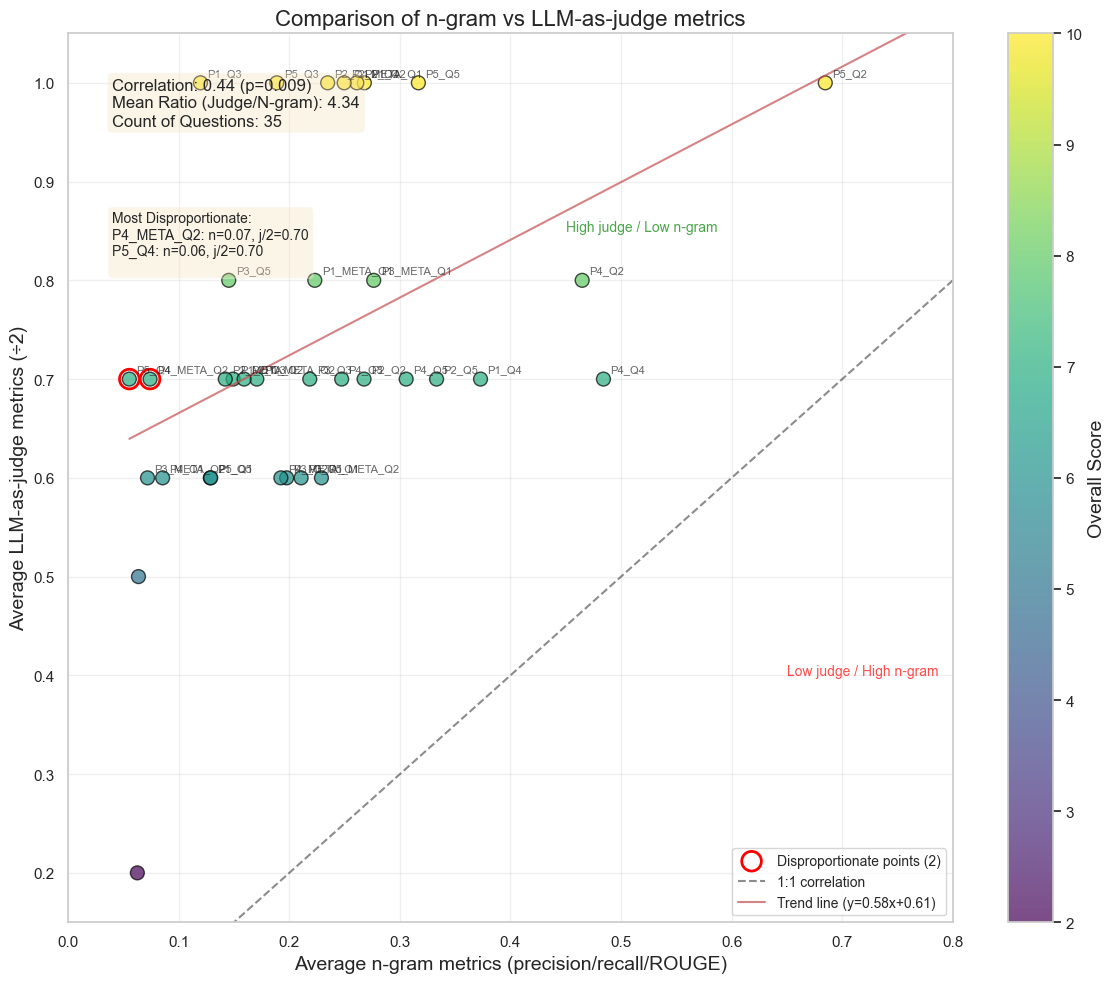


Metrics by Paper:
  Paper  N-gram (avg)  Judge/2 (avg)  Difference
0    P1         0.205          0.786       0.581
1    P2         0.235          0.829       0.593
2    P3         0.169          0.614       0.445
3    P4         0.265          0.686       0.421
4    P5         0.238          0.771       0.533


In [ ]:
# Calculate per-question averages for n-gram and judge metrics
baseline_n_avg = baseline[ngram_metrics].mean(axis=1)
rag_n_avg = rag[ngram_metrics].mean(axis=1)
baseline_judge_avg = baseline[judge_metrics].mean(axis=1)
rag_judge_avg = rag[judge_metrics].mean(axis=1)

# Compute overall averages for trendlines
baseline_n_mean = baseline_n_avg.mean()
rag_n_mean = rag_n_avg.mean()
baseline_judge_mean = baseline_judge_avg.mean()
rag_judge_mean = rag_judge_avg.mean()

# Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(baseline))

plt.plot(x, baseline_n_avg, 'o-', color=palette['Baseline'], alpha=0.5, label='Baseline n-gram (per question)')
plt.plot(x, rag_n_avg, 'o-', color=palette['RAG'], alpha=0.5, label='RAG n-gram (per question)')
plt.plot(x, baseline_judge_avg, 's--', color=palette['Baseline'], alpha=0.5, label='Baseline judge (per question)')
plt.plot(x, rag_judge_avg, 's--', color=palette['RAG'], alpha=0.5, label='RAG judge (per question)')

# Add trendlines (horizontal lines for averages)
plt.axhline(baseline_n_mean, color=palette['Baseline'], linestyle='-', linewidth=2, label='Baseline n-gram avg')
plt.axhline(rag_n_mean, color=palette['RAG'], linestyle='-', linewidth=2, label='RAG n-gram avg')
plt.axhline(baseline_judge_mean, color=palette['Baseline'], linestyle='--', linewidth=2, label='Baseline judge avg')
plt.axhline(rag_judge_mean, color=palette['RAG'], linestyle='--', linewidth=2, label='RAG judge avg')

plt.xlabel('Question Index', fontsize=label_fontsize)
plt.ylabel('Score', fontsize=label_fontsize)
plt.title('Average n-gram and judge metrics (trendlines)', fontsize=title_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate per-question averages for n-gram and judge metrics
baseline_n_avg = baseline[ngram_metrics].mean(axis=1)
rag_n_avg = rag[ngram_metrics].mean(axis=1)
baseline_judge_avg = baseline[judge_metrics].mean(axis=1)
rag_judge_avg = rag[judge_metrics].mean(axis=1)

# Compute overall averages for trendlines
baseline_n_mean = baseline_n_avg.mean()
rag_n_mean = rag_n_avg.mean()
baseline_judge_mean = baseline_judge_avg.mean()
rag_judge_mean = rag_judge_avg.mean()

# Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(baseline))

plt.plot(x, baseline_n_avg, 'o-', color=palette['Baseline'], alpha=0.5, label='Baseline n-gram (per question)')
plt.plot(x, rag_n_avg, 'o-', color=palette['RAG'], alpha=0.5, label='RAG n-gram (per question)')
plt.plot(x, baseline_judge_avg, 's--', color=palette['Baseline'], alpha=0.5, label='Baseline judge (per question)')
plt.plot(x, rag_judge_avg, 's--', color=palette['RAG'], alpha=0.5, label='RAG judge (per question)')

# Add trendlines (horizontal lines for averages)
plt.axhline(baseline_n_mean, color=palette['Baseline'], linestyle='-', linewidth=2, label='Baseline n-gram avg')
plt.axhline(rag_n_mean, color=palette['RAG'], linestyle='-', linewidth=2, label='RAG n-gram avg')
plt.axhline(baseline_judge_mean, color=palette['Baseline'], linestyle='--', linewidth=2, label='Baseline judge avg')
plt.axhline(rag_judge_mean, color=palette['RAG'], linestyle='--', linewidth=2, label='RAG judge avg')

plt.xlabel('Question Index', fontsize=label_fontsize)
plt.ylabel('Score', fontsize=label_fontsize)
plt.title('Average n-gram and judge metrics (trendlines)', fontsize=title_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tight_layout()
plt.show()